# DSESM - Fahad Shakeel -0477898

# Assignment 2 - Task 1 - Land Eligibility for Wind Turbines

# Task1a

In [7]:

import pandas as pd
import rasterio as rs
import atlite as at
import geopandas as gpd
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import numpy as np
from atlite.gis import ExclusionContainer
from urllib.request import urlretrieve
from atlite.gis import shape_availability
from rasterio.plot import show

# Task 1b

In [27]:
Data_set= {
    "Value": [1, 2, 3, 9, 10, 11,
              12, 13, 18, 19, 21, 
              26,28, 29, 32],
    "Code": [
        111, 112, 121, 133, 141, 142, 
        211, 212, 231, 241,  243, 
        321, 323, 324, 333
    ],
    "Description": [
        "Continuous urban fabric",
        "Discontinuous urban fabric",
        "Industrial or commercial units",
        "Construction sites",
        "Green urban areas",
        "Sport and leisure facilities",
        "Non-irrigated arable land",
        "Permanently irrigated land",
        "Pastures",
        "Annual crops associated with permanent crops",
        "Complex cultivation patterns",
        "Land principally occupied by agriculture with significant areas of natural vegetation",
        "Sclerophyllous vegetation",
        "Transitional woodland-shrub",
        "Sparsely vegetated areas"
    ],
    "Inclusion_Exclusion": [
        "Exclusion - 12000m",
        "Exclusion - 12000m",
        "Exclusion - 12000m",
        "Exclusion - 12000m",
        "Exclusion - 12000m",
        "Exclusion - 12000m",
        " NaN",
        "NaN",
        "NaN",
        "NaN",
        " NaN",
        "NaN",
        "NaN",
        "NaN",
        " NaN"
    ]
}


In [31]:
# (a) classes to which a distance should be kept
exc_classes = [1, 2, 3, 9, 10, 11]

# (b) classes deemed eligible for wind development
inc_classes = [12, 13, 18, 19, 21, 26,28, 29, 32]

# Iterate through the entries and print the required information for exclusion labels
print("Exclusion Classes:")
for i in range(len(Data_set["Value"])):
    code = Data_set["Value"][i]
    description = Data_set["Description"][i]
    inclusion_exclusion = Data_set["Inclusion_Exclusion"][i]
    
    if code in exc_classes:
        print(f"Label: {code}, Description: {description}, Inclusion/Exclusion: {inclusion_exclusion}")

# Iterate through the entries and print the required information for inclusion labels
print("\nInclusion Classes:")
for i in range(len(Data_set["Value"])):
    code = Data_set["Value"][i]
    description = Data_set["Description"][i]
    inclusion_exclusion = Data_set["Inclusion_Exclusion"][i]
    
    if code in inc_classes:
        print(f"Label: {code}, Description: {description}, Inclusion/Exclusion: {inclusion_exclusion}")


Exclusion Classes:
Label: 1, Description: Continuous urban fabric, Inclusion/Exclusion: Exclusion - 12000m
Label: 2, Description: Discontinuous urban fabric, Inclusion/Exclusion: Exclusion - 12000m
Label: 3, Description: Industrial or commercial units, Inclusion/Exclusion: Exclusion - 12000m
Label: 9, Description: Construction sites, Inclusion/Exclusion: Exclusion - 12000m
Label: 10, Description: Green urban areas, Inclusion/Exclusion: Exclusion - 12000m
Label: 11, Description: Sport and leisure facilities, Inclusion/Exclusion: Exclusion - 12000m

Inclusion Classes:
Label: 12, Description: Non-irrigated arable land, Inclusion/Exclusion:  NaN
Label: 13, Description: Permanently irrigated land, Inclusion/Exclusion: NaN
Label: 18, Description: Pastures, Inclusion/Exclusion: NaN
Label: 19, Description: Annual crops associated with permanent crops, Inclusion/Exclusion: NaN
Label: 21, Description: Complex cultivation patterns, Inclusion/Exclusion:  NaN
Label: 26, Description: Land principall

# Task 1c

In [32]:
in_source="https://tubcloud.tu-berlin.de/s/7bpHrAkjMT3ADSr/download/country_shapes.geojson"
cntry_shp = gpd.read_file(in_source).set_index('name')
exc= ExclusionContainer(crs=3035)
Lxmberg = cntry_shp.to_crs(exc.crs).loc[["LU"]].geometry
Lxmberg

name
LU    POLYGON ((4043458.177 3008253.833, 4042879.385...
Name: geometry, dtype: geometry

# Task 1d

The percentage of area excluded by natural protection areas is 24.187 %


/var/folders/d3/5j131h193zl4dd728sc732ym0000gn/T/ipykernel_47976/3303720599.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cntry_area = Lxmberg.geometry.area[0]


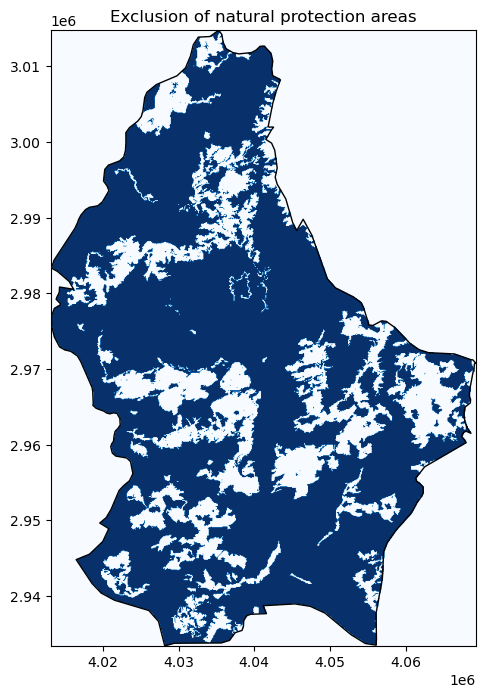

In [33]:
#1)To exclusion of  natural protection areas
data= "https://tubcloud.tu-berlin.de/s/zPMqJFPD8tKq2Ss/download/Natura2000_end2021-LU.gpkg"
exc = ExclusionContainer(crs=3035)
exc.add_geometry(data)

band, transform1 = shape_availability(Lxmberg, exc)

fig, ax1 = plt.subplots(figsize=(8, 8))
Lxmberg.plot(ax=ax1, color="none")
show(band, transform=transform1, cmap="Blues", ax=ax1)
plt.title("Exclusion of natural protection areas")

eligible = band.sum()
area = exc.res**2
eligible_area = area * eligible
cntry_area = Lxmberg.geometry.area[0]

exc = (1 - eligible_area/cntry_area)*100
print("The percentage of area excluded by natural protection areas is" ,round(exc,3), "%")

The percentage of area excluded of a radius of 7 km around airports is 3.009 %


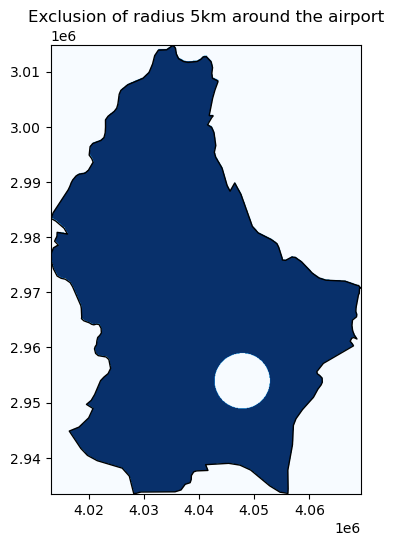

In [34]:
#2)exclusion of a radius of 5 km around airports
data1 = " https://tubcloud.tu-berlin.de/s/TbEJ9Lsy9EpTcQS/download/ne_10m_airports.gpkg"
exc1 = ExclusionContainer(crs=3035)
exc1.add_geometry(data1,buffer=5000)

band1, transform1 = shape_availability(Lxmberg, exc1)

fig1, ax1 = plt.subplots(figsize=(4, 8))
Lxmberg.plot(ax=ax1, color="none")
show(band1, transform=transform1, cmap="Blues", ax=ax1)
plt.title("Exclusion of radius 5km around the airport")

eligible1 = band1.sum()
area1 = exc1.res**2
eligible1= np.float64(eligible1)
area1 = np.float64(area1)
eligible_area1 = area1 * eligible1

exc1 = (1 - eligible_area1/cntry_area)*100
print("The percentage of area excluded of a radius of 7 km around airports is",round(exc1,3),"%")

The percentage of area excluded by a buffer of 500m next to major roads is 8.861 %


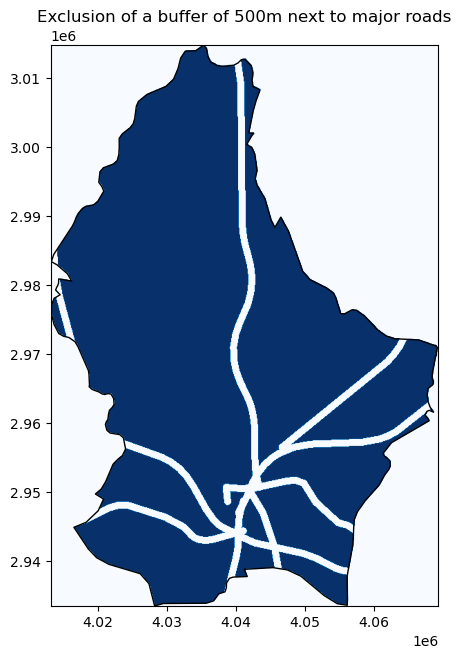

In [35]:
#3)exclusion of a buffer of 500m next to major roads
data2 = "https://tubcloud.tu-berlin.de/s/zcKQ95TgpyMJb8E/download/ne_10m_roads.gpkg"
exc2 = ExclusionContainer(crs=3035)
exc2.add_geometry(data2, buffer=500)

band2, transform2 = shape_availability(Lxmberg, exc2)

fig2, ax2 = plt.subplots(figsize=(5, 10))
Lxmberg.plot(ax=ax2, color="none")
show(band2, transform=transform2, cmap="Blues", ax=ax2)
plt.title("Exclusion of a buffer of 500m next to major roads")

eligible2 = band2.sum()
area2 = exc2.res**2
eligible2 = np.float64(eligible2)
area2 = np.float64(area2)
eligible_area2 = area2 * eligible2
eligible_area2/cntry_area
exc2 = (1 - eligible_area2/cntry_area)*100
print("The percentage of area excluded by a buffer of 500m next to major roads is", round(exc2,3), "%")

 Exclusion of a distance of 1200m around the following CORINE land cover classes: 111, 112, 121,133, 141, 142 is 68.309  %


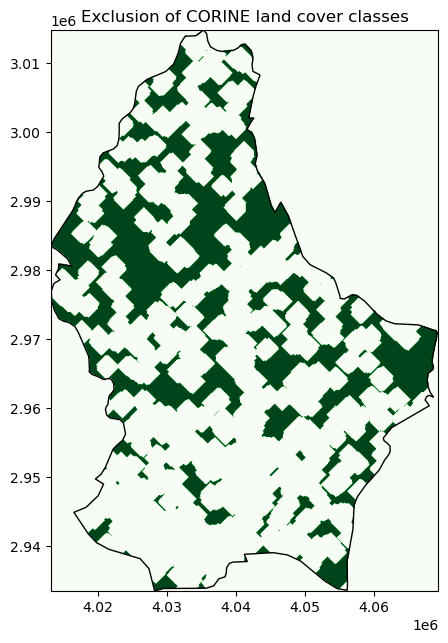

In [36]:
#4)Exclusion of a distance of 1200m around the following CORINE land cover classes: 111, 112, 121,133, 141, 142
#data3 = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
data3=rs.open('U2018_CLC2018_V2020_20u1-LU_4.tiff')
exc3 = ExclusionContainer(crs=3035)
exc3.add_raster(data3, codes =exc_classes , buffer=1200)

band3, transform3 = shape_availability(Lxmberg, exc3)

fig3, ax3 = plt.subplots(figsize=(5, 10))
Lxmberg.plot(ax=ax3, color="none")
show(band3, transform=transform3, cmap="Greens", ax=ax3)
plt.title("Exclusion of CORINE land cover classes")

eligible3 = band3.sum()
area3 = exc3.res**2
eligible3 = np.float64(eligible3)
area3 = np.float64(area3)
eligible_area3 = area3 * eligible3

exc3 = (1 - eligible_area3/cntry_area)*100
print(" Exclusion of a distance of 1200m around the following CORINE land cover classes: 111, 112, 121,133, 141, 142 is", round(exc3,3)," %")

Area included by a distance of CORINE land cover classes  211, 212, 231, 241, 243, 321, 323, 324, 333 is 39.442  %


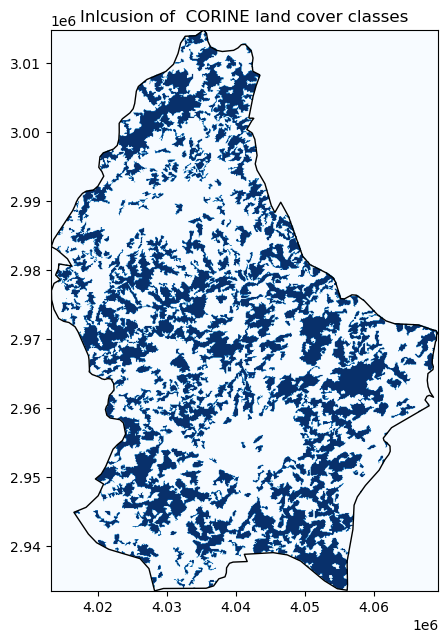

In [37]:
#5)inclusion only of the following CORINE land cover classes, which are deemed suitable for con- structing wind turbines: 211, 212, 231, 241, 243, 321, 323, 324, 333

#data4 = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
data4=rs.open('U2018_CLC2018_V2020_20u1-LU_5.tiff')
exc4 = ExclusionContainer(crs=3035)
exc4.add_raster(data4, codes =inc_classes , crs=3035, invert=True )

band4, transform4 = shape_availability(Lxmberg, exc4)

fig4, ax4 = plt.subplots(figsize=(5, 10))
Lxmberg.plot(ax=ax4, color="none")
show(band4, transform=transform4, cmap="Blues", ax=ax4)
plt.title("Inlcusion of  CORINE land cover classes")

eligible4 = band4.sum()
area4 = exc4.res**2
eligible4 = np.float64(eligible4)
area4 = np.float64(area4)
eligible_area4 = area4 * eligible4

exc4 = (1 - eligible_area4/cntry_area)*100
inc = (100 - exc4 )
print("Area included by a distance of CORINE land cover classes  211, 212, 231, 241, 243, 321, 323, 324, 333 is", round(inc,3)," %")

# Task 1e

In [38]:
#Plot and calculate (in %) the area available for the development of wind parks considering all exclusion and inclusion criteria together?

The percentage of area available for the development of wind parks considering all inclusion zones together is 8.68 %


/var/folders/d3/5j131h193zl4dd728sc732ym0000gn/T/ipykernel_47976/2850447697.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  country_area = Lxmberg.geometry.area[0]


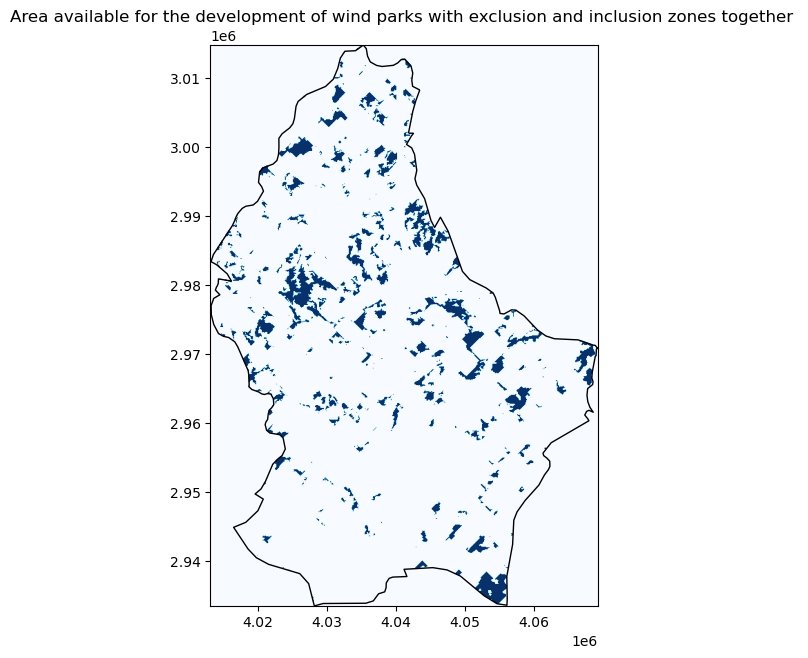

In [39]:
exc5 = ExclusionContainer(crs=3035)
exc5.add_geometry(data)

exc5.add_geometry(data1, buffer=5000)
exc5.add_geometry(data2, buffer=500)
exc5.add_raster(data3, codes=exc_classes, buffer=1200)
exc5.add_raster(data4, codes=inc_classes, invert=True)

band, transform = shape_availability(Lxmberg, exc5)

fig, ax = plt.subplots(figsize=(5, 10))
Lxmberg.plot(ax=ax, color="none")
show(band, transform=transform, cmap="Blues", ax=ax)
plt.title("Area available for the development of wind parks with exclusion and inclusion zones together ")

eligible = band.sum()
area = exc5.res**2
eligible_area = area * eligible
country_area = Lxmberg.geometry.area[0]

print(f"The percentage of area available for the development of wind parks considering all inclusion zones together is {eligible_area/country_area*100:.2f} %")

# Task 1f

Text(0.5, 1.0, 'Sensitivity Analysis change of buffer areas')

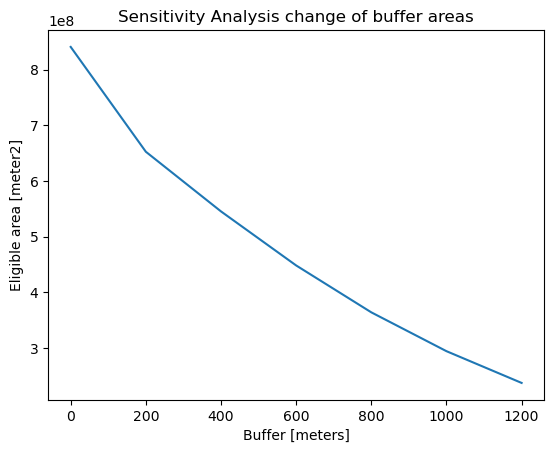

In [40]:
buf = [0, 200, 400, 600, 800, 1000, 1200]
eligible_area_for_buffer = []
for x in buf:
    excluder = ExclusionContainer(crs=3035)
    excluder.add_geometry(data)
    excluder.add_geometry(data1)
    excluder.add_geometry(data2)
    excluder.add_raster(data3, codes=exc_classes, buffer=x)
    excluder.add_raster(data4, codes=inc_classes, invert=True)
    
    band, transform = shape_availability(Lxmberg, excluder)
    eligible = band.sum()
    cell_area = excluder.res**2
    eligible_area = cell_area * eligible
    eligible_area_for_buffer.append(eligible_area)
    
plt.plot(buf, eligible_area_for_buffer)
plt.xlabel("Buffer [meters]")
plt.ylabel("Eligible area [meter2]")
plt.title("Sensitivity Analysis change of buffer areas")

# task 1g

In [41]:
ar800=eligible_area_for_buffer[5]/1000000 #km2
cap_fac = 0.32 
cap_den= 5 #MW/km2
tot_enrgy = (ar800 * cap_fac * cap_den * 365 * 24) / 1e6 
print("Total energy produced every year in Luxemberg from this wind plant at the buffer of 800 meters",round(tot_enrgy,2),"TWh")

Total energy produced every year in Luxemberg from this wind plant at the buffer of 800 meters 4.13 TWh


# DSESM - Fahad Shakeel -0477898
# Assignment 2 - Task 2: Dimensioning Lossless Storage

In [1]:
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To import the data

In [2]:

input = "https://tubcloud.tu-berlin.de/s/ppRkB2mwsKkJrRm/download/time-series-lecture-2.csv"

data_read = pd.read_csv(input, index_col=0)

data_read.index = pd.to_datetime(data_read.index)

data_read

,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh]
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,NaN
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,NaN
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,NaN
2015-01-01 03:00:00,38.765,0.1745,0.6803,0.0,NaN
2015-01-01 04:00:00,38.941,0.1826,0.7272,0.0,NaN
...,...,...,...,...,...
2015-12-31 19:00:00,47.719,0.1388,0.4434,0.0,36.79
2015-12-31 20:00:00,45.911,0.1211,0.4023,0.0,28.81
2015-12-31 21:00:00,45.611,0.1082,0.4171,0.0,26.27
2015-12-31 22:00:00,43.762,0.1026,0.4716,0.0,29.99


# task 2a

In [3]:
scl_solar = data_read['load [GW]'].sum() / data_read['solar [pu]'].sum()

scl_wind = data_read['load [GW]'].sum() / data_read['onwind [pu]'].sum()


data_read['onwind [GW]'] = data_read['onwind [pu]'] * scl_wind

data_read['solar [GW]'] = data_read['solar [pu]'] * scl_solar

data_read


,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh],onwind [GW],solar [GW]
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,NaN,41.700539,0.0
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,NaN,44.177008,0.0
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,NaN,46.493705,0.0
2015-01-01 03:00:00,38.765,0.1745,0.6803,0.0,NaN,46.467076,0.0
2015-01-01 04:00:00,38.941,0.1826,0.7272,0.0,NaN,48.624000,0.0
...,...,...,...,...,...,...,...
2015-12-31 19:00:00,47.719,0.1388,0.4434,0.0,36.79,36.960631,0.0
2015-12-31 20:00:00,45.911,0.1211,0.4023,0.0,28.81,32.247352,0.0
2015-12-31 21:00:00,45.611,0.1082,0.4171,0.0,26.27,28.812250,0.0
2015-12-31 22:00:00,43.762,0.1026,0.4716,0.0,29.99,27.321043,0.0


# task2b

In [4]:
if pd.Series([data_read['onwind [GW]'].sum(), data_read['solar [GW]'].sum()]).equals(data_read['load [GW]']):
    print("Sum matched after rescaling.")
else:
    print("Sum is not matched after rescaling.")

Sum is not matched after rescaling.


# task 2c

In [5]:

data_read = data_read.assign(sol_miss=data_read['load [GW]'] - data_read['solar [GW]'], osw_miss=data_read['load [GW]'] - data_read['onwind [GW]'])

data_read

,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh],onwind [GW],solar [GW],sol_miss,osw_miss
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,NaN,41.700539,0.0,41.151,-0.549539
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,NaN,44.177008,0.0,40.135,-4.042008
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,NaN,46.493705,0.0,39.106,-7.387705
2015-01-01 03:00:00,38.765,0.1745,0.6803,0.0,NaN,46.467076,0.0,38.765,-7.702076
2015-01-01 04:00:00,38.941,0.1826,0.7272,0.0,NaN,48.624000,0.0,38.941,-9.683000
...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,47.719,0.1388,0.4434,0.0,36.79,36.960631,0.0,47.719,10.758369
2015-12-31 20:00:00,45.911,0.1211,0.4023,0.0,28.81,32.247352,0.0,45.911,13.663648
2015-12-31 21:00:00,45.611,0.1082,0.4171,0.0,26.27,28.812250,0.0,45.611,16.798750
2015-12-31 22:00:00,43.762,0.1026,0.4716,0.0,29.99,27.321043,0.0,43.762,16.440957


# task2d


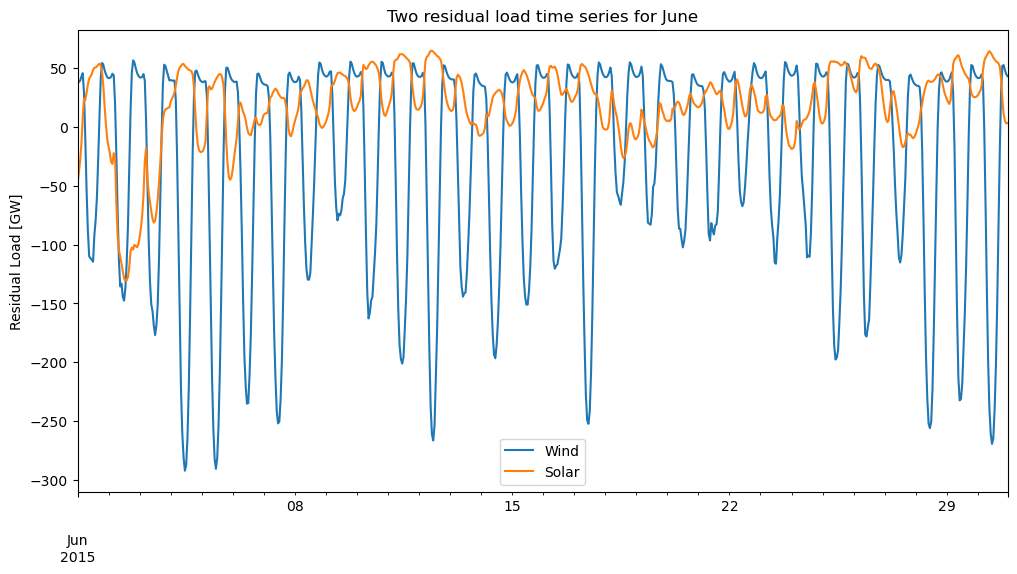

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
data_read.loc['2015-06', ['sol_miss','osw_miss']].plot(ax=ax)

plt.ylabel('Residual Load [GW]')
plt.title('Two residual load time series for June')
plt.legend(('Wind', 'Solar'), loc="lower center")

# task 2e

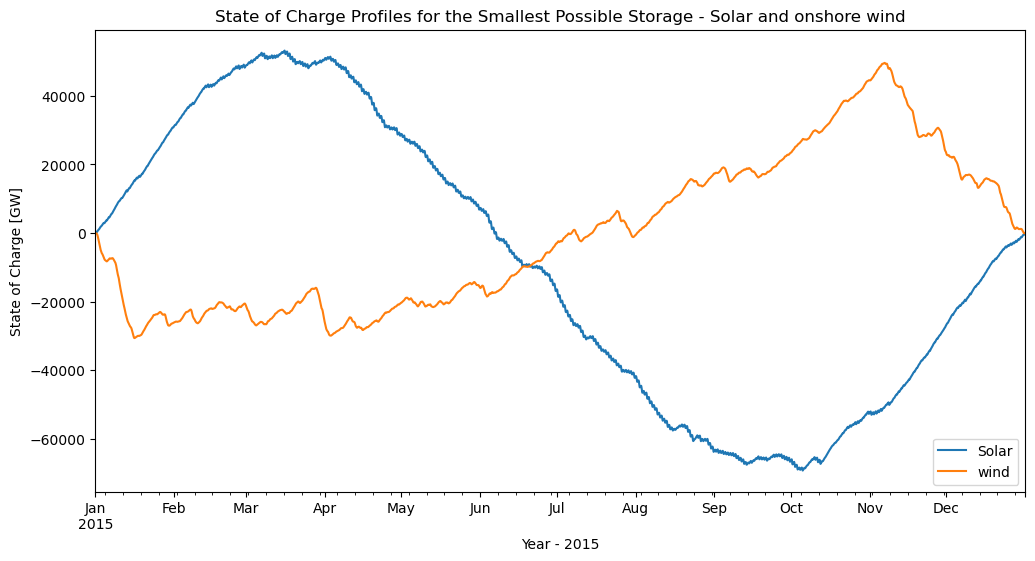

In [7]:
data_read['chg_solar'] = data_read['sol_miss'].cumsum()

data_read['chg_wind'] = data_read['osw_miss'].cumsum()


fig, ax = plt.subplots(figsize=(12, 6))

data_read.loc['2015', ['chg_solar', 'chg_wind']].plot(ax=ax)

plt.ylabel('State of Charge [GW]')
plt.xlabel('Year - 2015')
plt.title('State of Charge Profiles for the Smallest Possible Storage - Solar and onshore wind')
plt.legend(('Solar', 'wind'), loc="lower right")

In [8]:
print(f"Smallest possible storage for Wind will be {round(abs(min(data_read['chg_wind'])), 3)} [GW]")
print(f"Smallest possible storage for Solar Swill be {round(abs(min(data_read['chg_solar'])), 3)} [GW]")

Smallest possible storage for Wind will be 30664.188 [GW]
Smallest possible storage for Solar Swill be 69282.899 [GW]


# task 2f

In [12]:
##puurely for wind based system cc=charge capcacitc, dc= discharge capacity
dc_wind = abs(data_read['osw_miss'].max())

cc_wind = abs(data_read['osw_miss'].min())

wind_req = data_read['chg_wind'].max()


print("Purely Wind-Based System:" )

print("Energy capacity Required ",round(wind_req,3),"GWh")

print("Discharge capacity ",round(dc_wind,3),"GW")

print("charge capacity ",round(cc_wind,3),"GW")

Purely Wind-Based System:
Energy capacity Required  49614.163 GWh
Discharge capacity  68.401 GW
charge capacity  202.276 GW


In [13]:
##puurely for soalr based system
req_solar = data_read['chg_solar'].max()
cc_solar = abs(data_read['sol_miss'].min())
dc_solar = abs(data_read['sol_miss'].max())
print("Purely Solar Based System:" )

print("Energy capacity Required ",round(req_solar),"GWh")

print("Discharge capacity ",round(dc_solar,3),"GW")

print("charge capacity ",round(cc_solar,3),"GW")


Purely Solar Based System:
Energy capacity Required  53215 GWh
Discharge capacity  75.817 GW
charge capacity  300.043 GW


# task 2g


In [14]:
def residual_load(alpha):
    w_share = alpha
    s_share = 1 - alpha
    change = data_read['load [GW]'] - (data_read['solar [GW]'] * s_share + (data_read['onwind [GW]'] * w_share))
    return change

In [15]:
list_alpha = np.linspace(0, 1, 21)

load_data = pd.DataFrame()

for alpha in list_alpha:
    load_data[f'Alpha={alpha:.0%}'] = residual_load(alpha)

print(load_data)

                     Alpha=0%   Alpha=5%  Alpha=10%  Alpha=15%  Alpha=20%  \
2015-01-01 00:00:00    41.151  39.065973  36.980946  34.895919  32.810892   
2015-01-01 01:00:00    40.135  37.926150  35.717299  33.508449  31.299598   
2015-01-01 02:00:00    39.106  36.781315  34.456630  32.131944  29.807259   
2015-01-01 03:00:00    38.765  36.441646  34.118292  31.794939  29.471585   
2015-01-01 04:00:00    38.941  36.509800  34.078600  31.647400  29.216200   
...                       ...        ...        ...        ...        ...   
2015-12-31 19:00:00    47.719  45.870968  44.022937  42.174905  40.326874   
2015-12-31 20:00:00    45.911  44.298632  42.686265  41.073897  39.461530   
2015-12-31 21:00:00    45.611  44.170388  42.729775  41.289163  39.848550   
2015-12-31 22:00:00    43.762  42.395948  41.029896  39.663844  38.297791   
2015-12-31 23:00:00    41.905  40.606851  39.308702  38.010553  36.712404   

                     Alpha=25%  Alpha=30%  Alpha=35%  Alpha=40%  Alpha=45% 

# task 2h

Text(0.5, 0, 'Alpha')

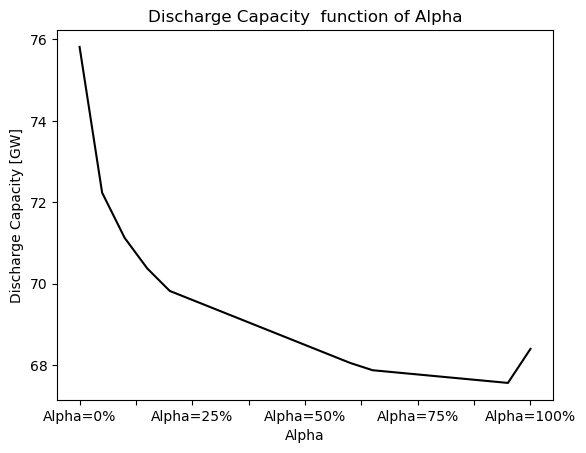

In [16]:
##capacity discharge 
load_data.max(axis=0).plot(color='black')
plt.title('Discharge Capacity  function of Alpha')
plt.ylabel('Discharge Capacity [GW]')
plt.xlabel('Alpha')


Text(0.5, 0, 'Alpha')

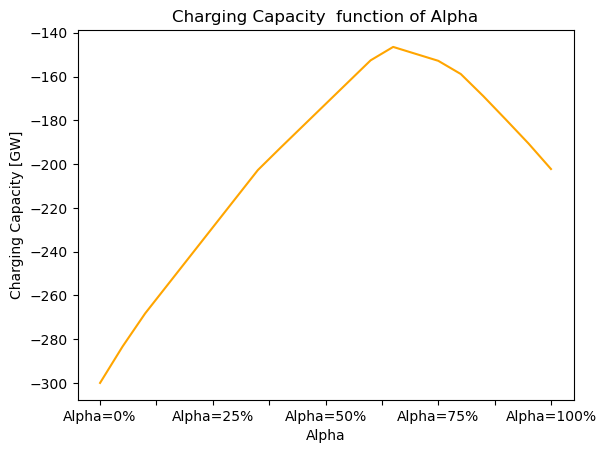

In [18]:
##charging capacity
load_data.min(axis=0).plot(color='orange')

plt.title('Charging Capacity  function of Alpha')

plt.ylabel('Charging Capacity [GW]')

plt.xlabel('Alpha')


# task2j

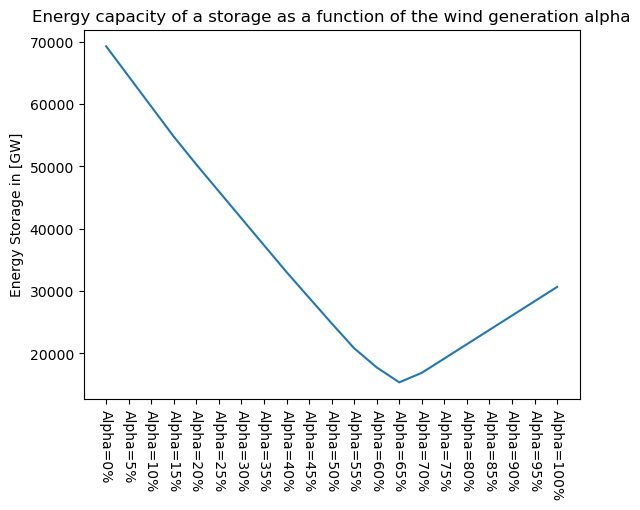

In [19]:
x = list(range(0, 21))
cum_sum_list = []
for y in x:
    z = abs(np.cumsum(load_data.iloc[:, y]).min())
    cum_sum_list.append(z)

name_alpha = list(load_data.columns)

plt.xticks(rotation=270)

plt.title('Energy capacity of a storage as a function of the wind generation alpha')
plt.ylabel('Energy Storage in [GW]')

plt.plot(name_alpha , cum_sum_list)


# task 2k


In [20]:
lowest_energy = pd.DataFrame({'Alpha': list_alpha, 'Energy_Capacity': cum_sum_list})

min_val =lowest_energy.loc[lowest_energy['Energy_Capacity'].idxmin(), 'Alpha'] * 100


print("The lowest energy capacity is", round(lowest_energy['Energy_Capacity'].min())," GWh which occurs at alpha %",round(min_val,3))

The lowest energy capacity is 15345  GWh which occurs at alpha % 65.0


# task 2l

Text(0.5, 1.0, 'State of Charge for Wind=100%, Solar=100% & Alpha=65%')

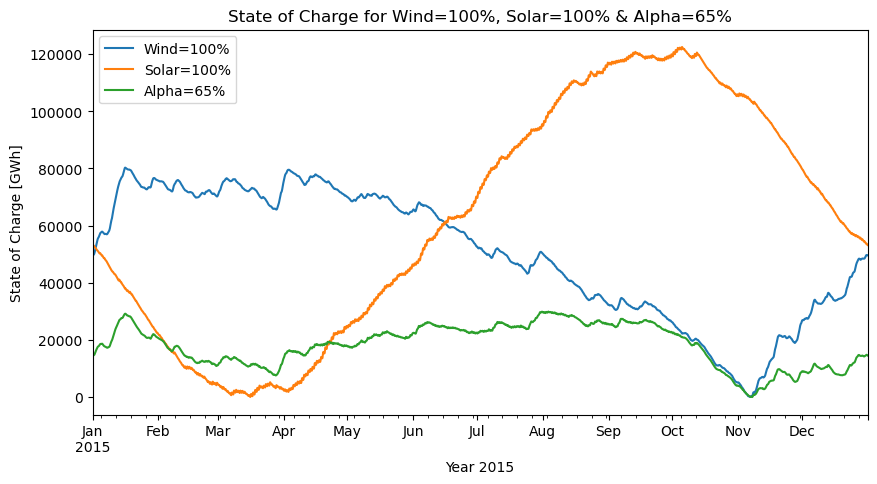

In [21]:

dc = data_read.copy()
dc['alpha_65'] = load_data['Alpha=65%']

dc['wind_cum_sum'] = -np.cumsum(dc.osw_miss)
wind_off = min(dc['wind_cum_sum'])
dc['sol_cum_sum'] = -np.cumsum(dc.sol_miss)
solar_off = min(dc['sol_cum_sum'])

dc['alpha_65_cum_sum'] = -np.cumsum(dc.alpha_65)
alpha_off = min(dc['alpha_65_cum_sum'])

fig, ax = plt.subplots(figsize=(10, 5))

columns = ['wind_cum_sum', 'sol_cum_sum', 'alpha_65_cum_sum']
labels = ['Wind=100%', 'Solar=100%', 'Alpha=65%']

for column, label in zip(columns, labels):
    ts = pd.Series(dc[column] + abs(dc[column].min()), index=dc.index)
    ts.plot(ax=ax)

plt.legend(labels, loc="upper left")
plt.ylabel('State of Charge [GWh]')
plt.xlabel('Year 2015')
plt.title('State of Charge for Wind=100%, Solar=100% & Alpha=65%')

explaination :
Mixing wind and solar power generation can reduce the storage requirements compared to using
100% of either wind or solar. This is because wind and solar generation have complementary
patterns: wind generation is generally higher during winter and nighttime, while solar generation
is higher during summer and daytime. By combining both, the overall variability in residual load
is reduced, leading to a lower required storage capacity.


# task2m

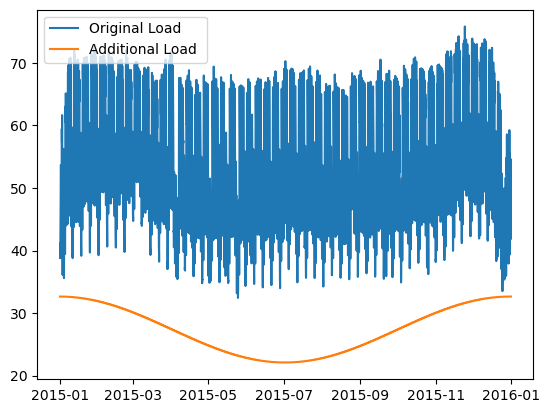

In [25]:

me = data_read['load [GW]'].mean()
ampli = (data_read['load [GW]'].max() - me) / 2


aditional_load = pd.Series(me / 2 + ampli/ 2 * np.cos(2 * np.pi * data_read.index.dayofyear / 365), index=load_data.index)


plt.plot(data_read.index, data_read['load [GW]'], label='Original Load ')
plt.plot(data_read.index, aditional_load, label='Additional Load ')
plt.legend(loc='upper left')
plt.show()

# DSESM - Fahad Shakeel -0477898
# Assignment 2 - Task 3: Designing a Run-of-River Power Plant

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


# Task 3a

In [3]:
input = " https://tubcloud.tu-berlin.de/s/af5G99i35dwNPCz/download/water-flows.csv"
source = pd.read_csv(input, parse_dates=True, index_col=0)
source

,Scaled Flow
Date,
1983-01-01,1.445017
1983-01-02,1.808810
1983-01-03,3.476350
1983-01-04,1.963007
1983-01-05,4.854887
...,...
2015-09-26,0.178665
2015-09-27,0.163430
2015-09-28,0.151888


In [4]:
index_type=type(source)
w=isinstance(source.index, pd.DatetimeIndex)
##index_type
w

True

# task 2b


<Axes: title={'center': 'Monthly  Mean Flowrate from 1983 to 2014'}, xlabel='Year', ylabel='Flow (m3/s)'>

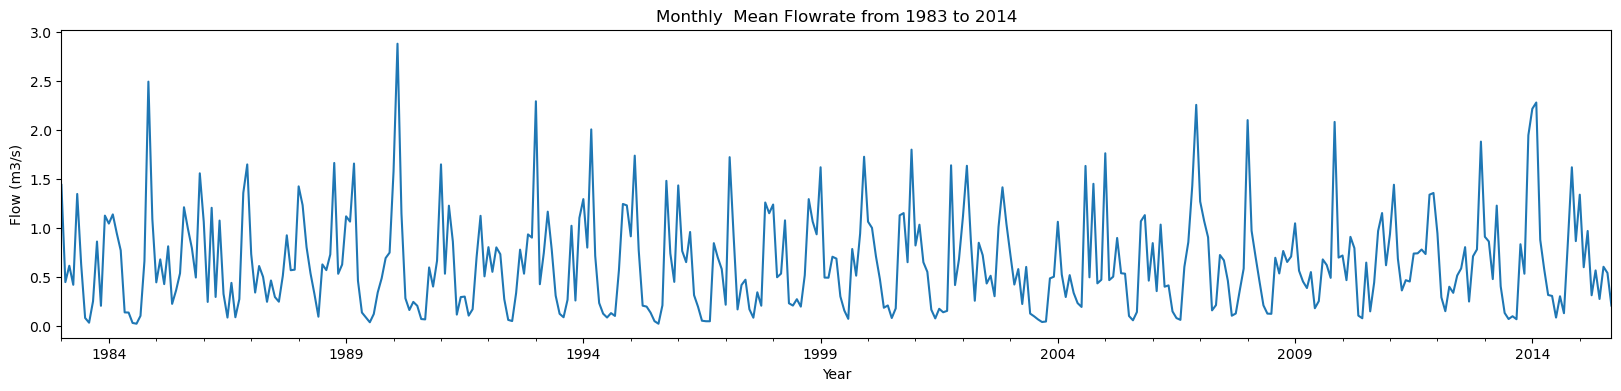

In [6]:

plt.figure(figsize=(20, 4))


plt.title('Monthly  Mean Flowrate from 1983 to 2014')

plt.xlabel('Year')

plt.ylabel('Flow (m3/s)')


source['Scaled Flow'].resample("ME").mean().plot(xlabel='Year')

# task 3c

In [8]:
comp_flow = source.quantile(0.08).values[0]
print("The compensation flow assuming 7% quantile is ",round(comp_flow,3),"m3/s.")

The compensation flow assuming 7% quantile is  0.069 m3/s.


In [9]:
#alternate way
compflow= np.quantile(source['Scaled Flow'], 0.07)
print("The compensation flow assuming 7% quantile is ",round(compflow,3),"m3/s.")

The compensation flow assuming 7% quantile is  0.064 m3/s.


# task 3d

In [11]:
desflow= source.quantile(0.80).values[0]
print("The design flow assuming 80% quantile is ",round(desflow,3),"m3/s.")

The design flow assuming 80% quantile is  0.961 m3/s.


In [12]:
#alternate way

des_flow = np.quantile(source['Scaled Flow'],0.80 )
print("The design flow assuming 80% quantile is ",round(des_flow,3),"m3/s.")

The design flow assuming 80% quantile is  0.961 m3/s.


# Task 3e

In [13]:

avlbl_flw = source['Scaled Flow'] - np.quantile(source['Scaled Flow'], 0.07)

avlbl_flw = np.clip(avlbl_flw, 0 , des_flow)

source['Available_Flow'] = avlbl_flw

source

,Scaled Flow,Available_Flow
Date,,
1983-01-01,1.445017,0.961190
1983-01-02,1.808810,0.961190
1983-01-03,3.476350,0.961190
1983-01-04,1.963007,0.961190
1983-01-05,4.854887,0.961190
...,...,...
2015-09-26,0.178665,0.114660
2015-09-27,0.163430,0.099425
2015-09-28,0.151888,0.087883


# task 3f

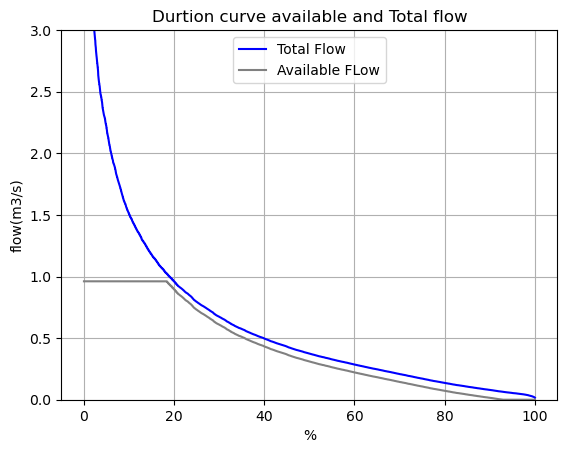

In [15]:
totflow = source['Scaled Flow'].sort_values(ascending =  False).reset_index(drop=True)

avlflow = source['Available_Flow'].sort_values(ascending =  False).reset_index(drop=True)

x = np.linspace(0,100, len(source.Available_Flow))

plt.plot(x, totflow, label= 'Total Flow', color='blue')

plt.plot(x, avlflow, label= 'Available FLow', color='grey')

plt.ylabel('flow(m3/s)')

plt.title('Durtion curve available and Total flow')

plt.xlabel('%')

plt.ylim(0,3)

plt.grid(True)

plt.legend(loc='upper center')

# task 3g

In [17]:
wtr_dnsty = 1000 #in kilogram/m3
gnrtor_efficny = 0.92
g = 9.81 # gravity in m/s2
gnrtor_head = 48 #meters
p = (gnrtor_efficny * wtr_dnsty * g * des_flow * gnrtor_head)/ 1000000
print("The run of river rated power is",round(p,3),"MW.")


The run of river rated power is 0.416 MW.


# task 3h

In [19]:
source['Available_Power'] = (source['Available_Flow']* gnrtor_efficny * wtr_dnsty * g * gnrtor_head)  / 1000000
source

,Scaled Flow,Available_Flow,Available_Power
Date,,,
1983-01-01,1.445017,0.961190,0.416397
1983-01-02,1.808810,0.961190,0.416397
1983-01-03,3.476350,0.961190,0.416397
1983-01-04,1.963007,0.961190,0.416397
1983-01-05,4.854887,0.961190,0.416397
...,...,...,...
2015-09-26,0.178665,0.114660,0.049672
2015-09-27,0.163430,0.099425,0.043072
2015-09-28,0.151888,0.087883,0.038072


# task 3i

In [21]:
cap_fac =  source['Available_Power'].mean() / p * 100
print("capacity factor of run of river plant is",round(cap_fac,3),"%") 

capacity factor of run of river plant is 43.056 %


# task 3j

In [23]:
yeilds=source['Available_Power'].resample('YE').sum()
yeilds

Date
1983-12-31    64.651517
1984-12-31    69.828173
1985-12-31    74.686406
1986-12-31    67.638502
1987-12-31    61.936346
1988-12-31    82.356906
1989-12-31    60.584285
1990-12-31    59.395590
1991-12-31    63.861595
1992-12-31    64.465335
1993-12-31    60.444598
1994-12-31    65.905243
1995-12-31    58.029465
1996-12-31    57.852042
1997-12-31    52.889265
1998-12-31    73.304633
1999-12-31    67.263785
2000-12-31    73.628511
2001-12-31    55.828938
2002-12-31    84.552001
2003-12-31    39.182189
2004-12-31    66.243185
2005-12-31    62.738268
2006-12-31    61.183312
2007-12-31    59.151008
2008-12-31    69.619446
2009-12-31    67.362144
2010-12-31    60.508438
2011-12-31    88.990566
2012-12-31    64.478518
2013-12-31    56.005729
2014-12-31    78.866342
2015-12-31    51.001000
Freq: YE-DEC, Name: Available_Power, dtype: float64

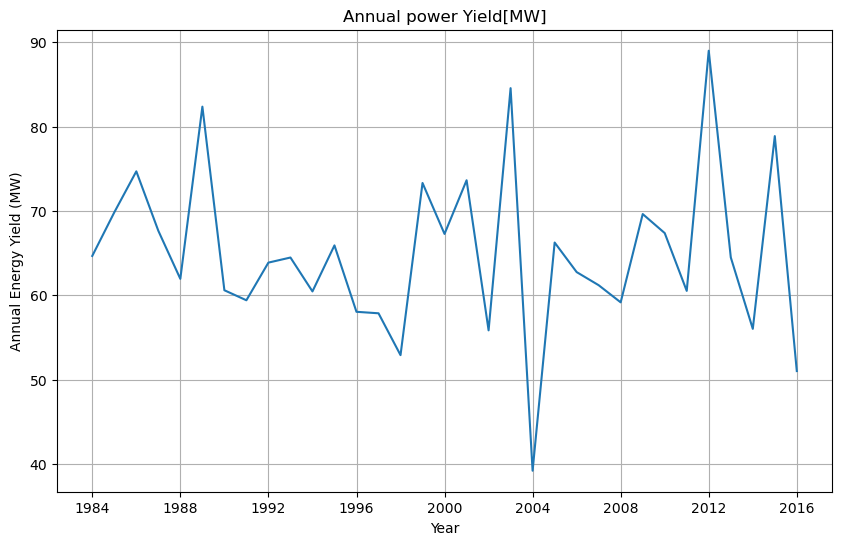

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(yeilds)
plt.title('Annual power Yield[MW]')
plt.xlabel('Year')
plt.ylabel('Annual Energy Yield (MW)')
plt.grid(True)
plt.show()

# task 3k

In [26]:
rd = source['Available_Power'].resample('YE').sum() - source['Available_Power'].resample('YE').sum().mean() # MW
red = ((source['Available_Power'].resample('YE').sum() - source['Available_Power'].resample('YE').sum().mean()) / source['Available_Power'].resample('YE').sum().mean()) * 100

Text(0.5, 0, 'Year')

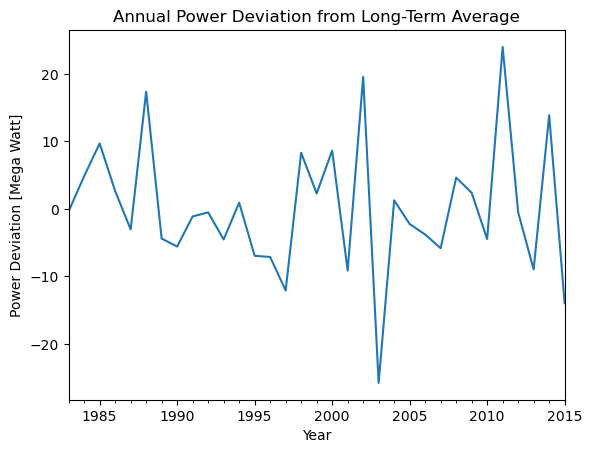

In [27]:
rd.plot()
plt.title('Annual Power Deviation from Long-Term Average')

plt.ylabel('Power Deviation [Mega Watt]')
plt.xlabel('Year')


Text(0.5, 0, 'Year')

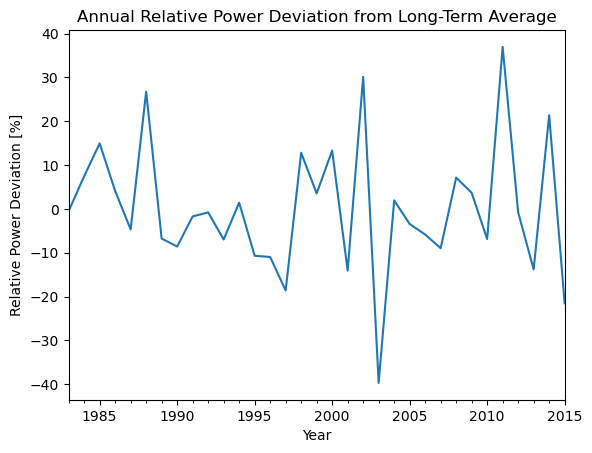

In [28]:
red.plot()
plt.title('Annual Relative Power Deviation from Long-Term Average')


plt.ylabel('Relative Power Deviation [%]')

plt.xlabel('Year')



# task 3l

In [31]:
alpha_list = np.linspace(0, 1, 21)
Power_List = []
Ann_energy = []
string = 'alpha='


In [34]:
for alpha in alpha_list:
    temp = string + str(round(alpha*100)) + "%"

    dataset_new[temp] = dataset_new['Available_Flow'].clip(upper=np.quantile(dataset_new['ScaledFlow'], alpha))
    new_power = (gnrtor_efficny * wtr_dnsty * g * gnrtor_head * dataset_new[temp].max()) / 1e6
    Power_List.append(new_power)

    dataset_new['Available_Power'] = (dataset_new[temp] * gnrtor_efficny* wtr_dnsty * g * gnrtor_head) / 1e6
    Ann_energy.append(dataset_new['Available_Power'].resample("YE").sum().mean())
    
new_power

4.7723225846976005

In [35]:
Power_List[20] == p

False

In [36]:
dataset_new['alpha=80%'].sum() == source['Available_Flow'].sum()

False

In [37]:
Ann_energy[20] == source['Available_Power'].resample("YE").sum().mean()

False

In [38]:
dataset_new

,ScaledFlow,Available_Flow,alpha=0%,Available_Power,alpha=5%,alpha=10%,alpha=15%,alpha=20%,alpha=25%,alpha=30%,...,alpha=55%,alpha=60%,alpha=65%,alpha=70%,alpha=75%,alpha=80%,alpha=85%,alpha=90%,alpha=95%,alpha=100%
Date,,,,,,,,,,,,,,,,,,,,,
1983-01-01,1.445017,1.390448,0.016435,0.602355,0.054569,0.079776,0.106368,0.136561,0.171463,0.208212,...,0.431197,0.496476,0.574590,0.673387,0.794436,0.961190,1.178173,1.390448,1.390448,1.390448
1983-01-02,1.808810,1.754241,0.016435,0.759954,0.054569,0.079776,0.106368,0.136561,0.171463,0.208212,...,0.431197,0.496476,0.574590,0.673387,0.794436,0.961190,1.178173,1.511497,1.754241,1.754241
1983-01-03,3.476350,3.421781,0.016435,1.482348,0.054569,0.079776,0.106368,0.136561,0.171463,0.208212,...,0.431197,0.496476,0.574590,0.673387,0.794436,0.961190,1.178173,1.511497,2.206767,3.421781
1983-01-04,1.963007,1.908438,0.016435,0.826754,0.054569,0.079776,0.106368,0.136561,0.171463,0.208212,...,0.431197,0.496476,0.574590,0.673387,0.794436,0.961190,1.178173,1.511497,1.908438,1.908438
1983-01-05,4.854887,4.800318,0.016435,2.079544,0.054569,0.079776,0.106368,0.136561,0.171463,0.208212,...,0.431197,0.496476,0.574590,0.673387,0.794436,0.961190,1.178173,1.511497,2.206767,4.800318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-26,0.178665,0.124096,0.016435,0.053760,0.054569,0.079776,0.106368,0.124096,0.124096,0.124096,...,0.124096,0.124096,0.124096,0.124096,0.124096,0.124096,0.124096,0.124096,0.124096,0.124096
2015-09-27,0.163430,0.108861,0.016435,0.047160,0.054569,0.079776,0.106368,0.108861,0.108861,0.108861,...,0.108861,0.108861,0.108861,0.108861,0.108861,0.108861,0.108861,0.108861,0.108861,0.108861
2015-09-28,0.151888,0.097319,0.016435,0.042160,0.054569,0.079776,0.097319,0.097319,0.097319,0.097319,...,0.097319,0.097319,0.097319,0.097319,0.097319,0.097319,0.097319,0.097319,0.097319,0.097319


In [39]:
data_names = [col for col in dataset_new.columns if col not in ['ScaledFlow', 'Available_Flow', 'Available_Power']]


In [40]:
dataset_new = pd.DataFrame({'Power': Power_List, 'Mean_AnnualEnergyYield': Ann_energy}, index=data_names)
dataset_new

,Power,Mean_AnnualEnergyYield
alpha=0%,0.007120,2.406500
alpha=5%,0.023640,7.676140
alpha=10%,0.034560,10.935193
alpha=15%,0.046080,14.204982
alpha=20%,0.059160,17.730225
alpha=25%,0.074279,21.567130
alpha=30%,0.090199,25.333850
alpha=35%,0.106959,29.006918
alpha=40%,0.123719,32.397774
alpha=45%,0.141919,35.785904


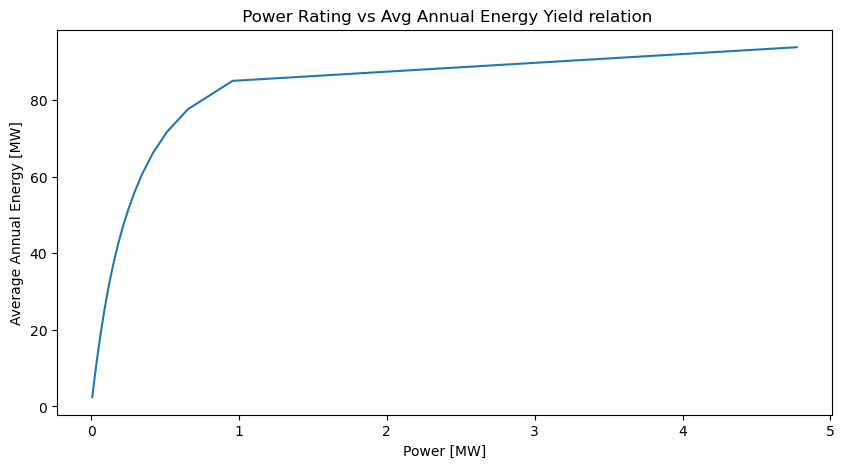

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set(xlabel='Power [MW]', ylabel='Average Annual Energy [MW]', title=' Power Rating vs Avg Annual Energy Yield relation')



ax.plot(dataset_new['Power'], dataset_new['Mean_AnnualEnergyYield'])




plt.show()

In [43]:
# this graph shwos that the generator is designed to operate at its max flow rate, and the annual average yeild is bit on higher side.is it possible to increse the max flow 75% to 90%(85%to)90%)